In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_products = pd.read_csv('./dataset/counterfeit_products.csv')
df_transactions = pd.read_csv('./dataset/_counterfeit_transactions.csv')

In [9]:
print(df_products.head())

  product_id    seller_id      category           brand   price  \
0   dcb12716  seller_5426   Electronics      DigitalPro  218.54   
1   d1f8b777  seller_4385  Luxury Goods        TechCrop   20.72   
2   9989f13a  seller_2528       Fashion  FashionForward   18.87   
3   4e008120  seller_8099   Electronics   CircuitMaster   79.27   
4   933b65ba  seller_7873  Luxury Goods    PremiumCraft  225.98   

   seller_rating  seller_reviews  product_images  description_length  \
0            4.9            5291               7                 220   
1            3.2              29               2                 179   
2            3.9              14               2                 100   
3            4.9            8533               4                 976   
4            3.8            7655               4                 589   

   shipping_time_days  ...  shipping_origin  views  purchases  wishlist_adds  \
0                   7  ...               JP   3454         99             23   
1   

In [ ]:
df_products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   product_id                5000 non-null   object        
 1   seller_id                 5000 non-null   object        
 2   category                  5000 non-null   int64         
 3   brand                     5000 non-null   int64         
 4   price                     5000 non-null   float64       
 5   seller_rating             5000 non-null   float64       
 6   seller_reviews            5000 non-null   int64         
 7   product_images            5000 non-null   int64         
 8   description_length        5000 non-null   int64         
 9   shipping_time_days        5000 non-null   int64         
 10  spelling_errors           5000 non-null   int64         
 11  domain_age_days           5000 non-null   int64         
 12  contact_info_complet

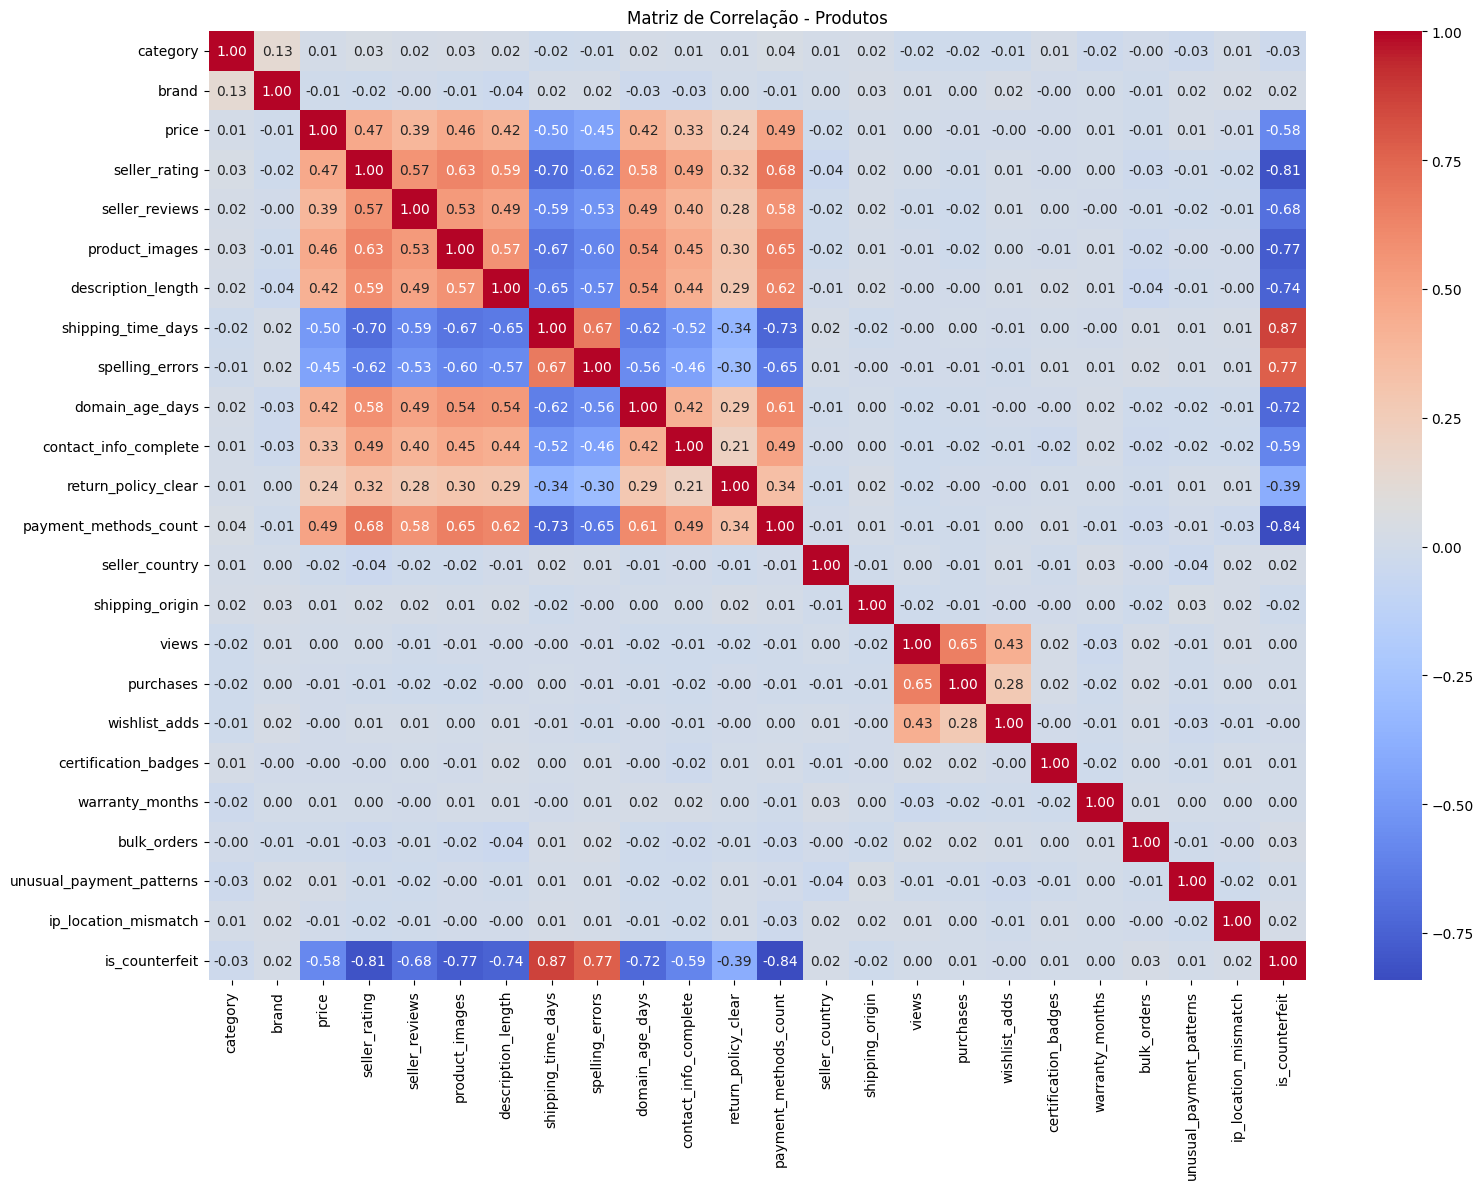

In [13]:
from sklearn.preprocessing import LabelEncoder

# Converter data para datetime
df_products['listing_date'] = pd.to_datetime(df_products['listing_date'])

# Codificar variáveis categóricas
label_cols = ['category', 'brand', 'seller_country', 'shipping_origin']
for col in label_cols:
    df_products[col] = LabelEncoder().fit_transform(df_products[col])

# Converter booleanos para inteiros
df_products = df_products.astype({col: 'int' for col in df_products.select_dtypes('bool').columns})

# Selecionar apenas colunas numéricas
df_numeric = df_products.select_dtypes(include=['int64', 'float64'])

# Criar matriz de correlação
plt.figure(figsize=(16, 12))
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Produtos')
plt.tight_layout()
plt.show()

In [29]:
df_transactions.describe

<bound method NDFrame.describe of      transaction_id customer_id    transaction_date  customer_age  \
0        TXN_957334  CUST_11907 2024-10-12 03:52:13            22   
1        TXN_246397  CUST_27641 2024-08-18 00:36:57            62   
2        TXN_403072  CUST_78628 2024-08-19 22:21:30            75   
3        TXN_848560  CUST_98579 2025-04-16 18:49:39            56   
4        TXN_270817  CUST_67519 2024-10-06 13:30:52            19   
...             ...         ...                 ...           ...   
2995     TXN_871091  CUST_24811 2025-05-15 21:20:07            54   
2996     TXN_962121  CUST_83828 2024-09-09 16:59:59            33   
2997     TXN_816757  CUST_66695 2025-02-26 20:40:23            19   
2998     TXN_116346  CUST_87035 2024-12-21 03:07:24            19   
2999     TXN_110910  CUST_47783 2025-03-10 21:24:48            35   

     customer_location  quantity  unit_price  total_amount payment_method  \
0                   JP         1      199.66        199.66  

In [16]:
# Garantir que a coluna envolve falsificação esteja em formato numérico
df_transactions['involves_counterfeit'] = df_transactions['involves_counterfeit'].astype(int)

# Selecionar apenas colunas numéricas
numeric_cols = df_transactions.select_dtypes(include=['number'])

# Calcular correlação de Pearson com involves_counterfeit
correlation_matrix = numeric_cols.corr()

# Obter somente as correlações com a coluna de interesse
correlations_with_target = correlation_matrix['involves_counterfeit'].drop('involves_counterfeit').sort_values(ascending=False)

correlations_with_target

quantity                   0.764782
total_amount               0.186583
shipping_cost              0.019346
customer_age               0.005421
delivery_time_days        -0.012864
discount_percentage       -0.018855
unit_price                -0.539931
customer_history_orders   -0.632745
Name: involves_counterfeit, dtype: float64

C:\Users\V12 Informatica\AppData\Local\Temp\ipykernel_12192\365822350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_target.values, y=correlations_with_target.index, palette="winter")


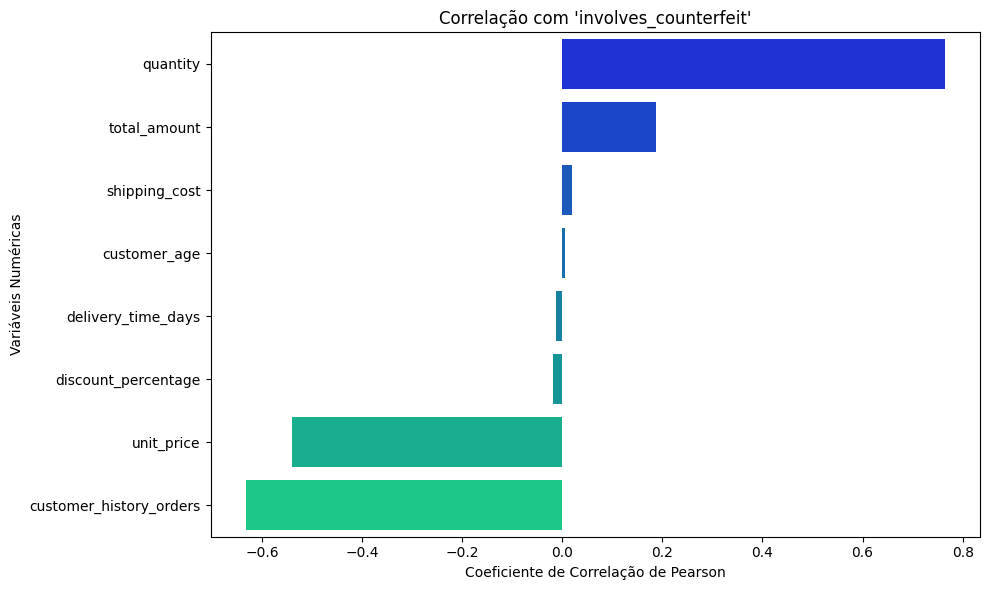

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x=correlations_with_target.values, y=correlations_with_target.index, palette="winter")
plt.title("Correlação com 'involves_counterfeit'")
plt.xlabel("Coeficiente de Correlação de Pearson")
plt.ylabel("Variáveis Numéricas")
plt.tight_layout()
plt.show()

In [27]:
# Converter 'involves_counterfeit' para int (0 e 1)
df_transactions['involves_counterfeit'] = df_transactions['involves_counterfeit'].astype(int)

# Selecionar colunas booleanas (True/False)
bool_cols = df_transactions.select_dtypes(include=['bool']).columns

# Converter booleanas para inteiros 0 e 1
df_transactions[bool_cols] = df_transactions[bool_cols].astype(int)

# Calcular correlação de Pearson entre envolve falsificação e as colunas booleanas convertidas
correlations_bool = df_transactions[bool_cols].corrwith(df_transactions['involves_counterfeit']).sort_values(ascending=False)

print(correlations_bool)


refund_requested          0.349443
geolocation_mismatch      0.013693
device_fingerprint_new    0.005886
velocity_flag            -0.006705
discount_applied         -0.010856
dtype: float64


In [30]:
# Converter para datetime se necessário
df_transactions['transaction_date'] = pd.to_datetime(df_transactions['transaction_date'])

# Extrair a hora do dia (0 a 23)
df_transactions['transaction_hour'] = df_transactions['transaction_date'].dt.hour

# Agora calcular correlação entre involves_counterfeit e transaction_hour
correlation_hour = df_transactions['involves_counterfeit'].corr(df_transactions['transaction_hour'])

print(f"Correlação entre involves_counterfeit e hora da transação: {correlation_hour}")


Correlação entre involves_counterfeit e hora da transação: -0.008158843277214405
